In [1]:
using DataFrames, PyPlot, LowRankModels, StatsBase
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [2]:
k2clustering = readtable("W with k = 2.csv")

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54
1,-0.304820250558674,-0.1386699104724642,-0.23699272365585397,-0.10513380202491875,-0.3534079674407424,-0.07525171819007755,-0.4134306382118625,-0.06073199176344874,-0.36874063821394637,-0.10655839271926115,-0.05105584253877886,-0.043411126705138914,-0.1425746570435856,-0.45997706488765994,-0.14497755397914797,-0.43080494338717235,-0.056012827651362306,-0.07284905807293138,-0.044541000497922166,-0.20300766639621476,-0.12209332965822411,-0.09536401509235694,-0.3196567150901738,-0.45239736822365234,-0.05107565551828214,-0.7004917224457966,-0.06902466378792799,-0.2830299849343015,-0.08088111573976499,-0.2731575778697248,-0.3123310343303859,-0.3363935729501017,-0.1264400463503041,-0.212420875891693,-0.09288434788138834,-0.31078724702306904,-0.0722236149902629,-0.0639644800795068,1.6845359088083243,-0.9655051595619162,0.3385199724163012,4.804281960044608,-0.5101065724523001,0.044547531177665654,-1.0922427266528807,0.7962553074789521,-1.8122690097624907,-0.08602991862884189,0.23848994696789233,-0.2432497801236622,-0.27331273775252546,0.10678933104378226,1.5053587447255043,-0.5566546882305372
2,0.28432510785026877,-0.6490559461617156,1.3745761934550604,0.3466003028575113,1.5995238435661987,0.4270219148974726,0.2858699258391899,0.8508303482251686,2.1089046899990165,0.2980310690464624,0.36777098533376007,0.4955767662906378,0.44453465667906306,0.24616117196733903,0.3592174811763851,0.344658272454121,0.42225375829814943,0.5375560556366553,0.4468676794779273,0.4410733641110608,0.5067590686422474,0.290926189328729,1.8781535390070838,0.804501030222499,0.4818630061362072,-0.06919140427448263,0.2248464153128263,0.05293096410985341,0.5854461498078793,0.3174318798029152,0.10421279258827673,0.12481293338813908,0.8387331834048937,0.3495257420772112,0.3836553558578902,0.17401716803728998,0.15526458941474108,0.14949230250070478,-0.22871085039440905,-0.7916891167596176,0.4485097871071032,-8.163940276660545,-1.3273734833431325,-0.5173830913536573,-1.041471620103105,1.0562079700010625,-0.004448514177361195,-1.3253492833526122,-0.0077293127683707875,1.0031782815295325,0.4557346942867985,0.9133569091642098,0.431842070934708,1.6122132680000374


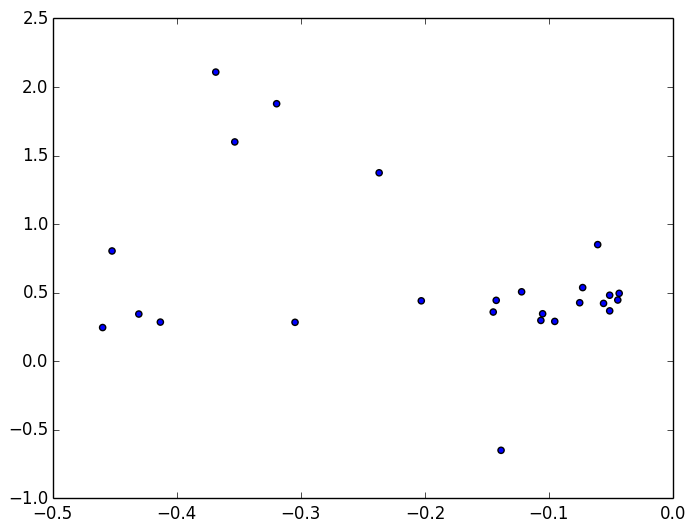

PyObject <matplotlib.collections.PathCollection object at 0x3200a0f90>

In [6]:
scatter( convert(Array{Float64,2},k2clustering[1,1:25]),convert(Array{Float64,2},k2clustering[2,1:25]))

In [7]:
k3clustering = readtable("W with k = 3.csv")

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
1,-0.27401744812110856,1.3686333992404147,1.4757252218475374,0.3368629418084292,0.36641072852049544,-0.5009619846421165,0.6019941170445798,0.2897308470756353,0.630583799147866,-0.36857472448125456,-0.6030866940642271,0.06995721033884612,0.9666245573358228,0.6120183373166795,0.27820841919782796,0.3911259408137592,0.08034709437360778,-0.4564715605358477,-1.0320733746741397,0.35752324041954037,0.2924115171892127,0.7550570575842277,1.034735185979694,0.6878993620987309,-1.6046194781426997
2,-0.8100994044406447,-0.022633445839543503,-0.8577883760888744,-0.029765361658928992,-0.6299137847850937,0.004345121838233099,0.022949487268617393,-0.8790693365750527,-0.022950763789892796,-0.9366511465386885,-0.2851122556504801,-0.7341961168344925,-0.024831664694659916,-0.558001925118436,-1.030232243112708,-0.4942335987494683,-0.09607659070807446,-0.5004822641265984,-1.2578334122567993,0.013088793934296954,-0.08760382690771802,-0.10507706566048797,-0.08865453523409673,-0.8062838518147006,-1.0315850804374276
3,-0.46499771710317944,-0.7089163697252439,1.0446643280304977,0.9041592443620474,0.8025316014671693,1.7882975236372565,0.5885633180775418,-0.46686142360779714,0.379938530288791,0.22000404641091714,1.36159713331994,-1.5109003482254837,0.27685096740405224,-0.6572013528126384,-0.012171499570980187,0.13807199581171614,0.6291229707885345,-0.8553062412785818,1.104607137609254,0.3857373103100563,0.2589457610373355,1.3708642166584721,-1.1018083523380764,0.19148661672712056,-0.7258574064686855


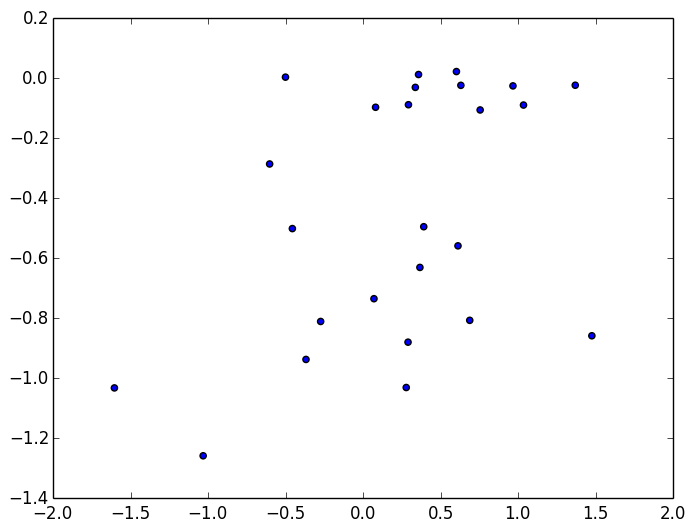

PyObject <matplotlib.collections.PathCollection object at 0x32237d050>

In [10]:
scatter( convert(Array{Float64,2},k3clustering[1,1:25]),convert(Array{Float64,2},k3clustering[2,1:25]))

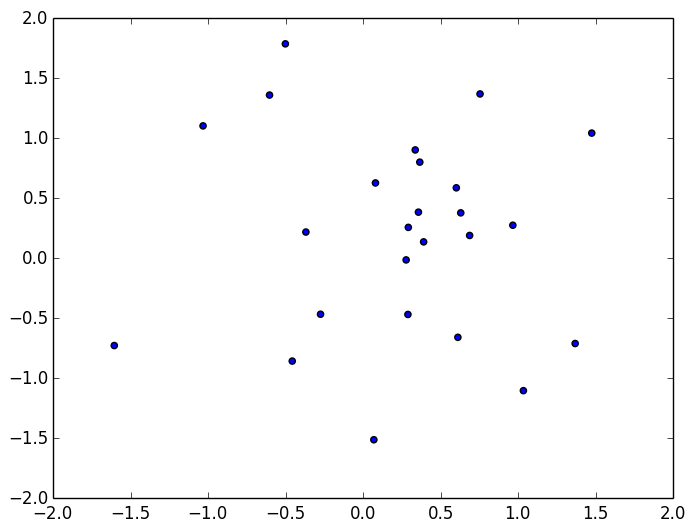

PyObject <matplotlib.collections.PathCollection object at 0x3225a4610>

In [11]:
scatter( convert(Array{Float64,2},k3clustering[1,1:25]),convert(Array{Float64,2},k3clustering[3,1:25]))

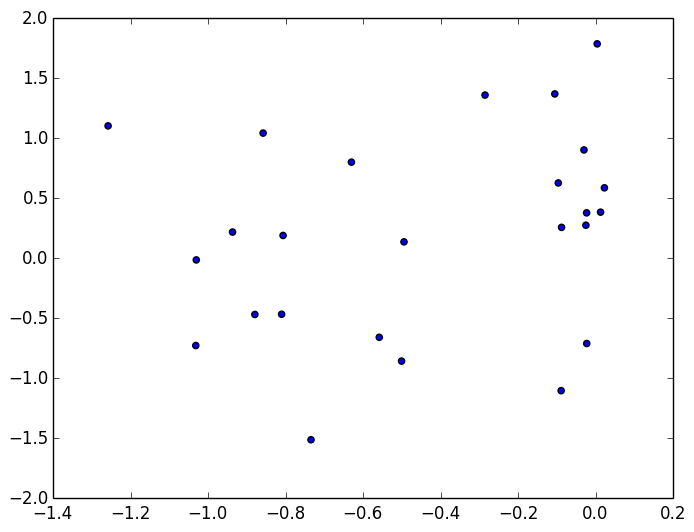

PyObject <matplotlib.collections.PathCollection object at 0x3227cf690>

In [12]:
scatter( convert(Array{Float64,2},k3clustering[2,1:25]),convert(Array{Float64,2},k3clustering[3,1:25]))